In [69]:
from sympy import Symbol, simplify, lambdify, expand
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from functools import reduce
import operator

### Інтерполяційний многочлен Лагранжа

In [70]:
x_values = [
    -20.061, -18.460, -18.119, -17.455,
    -15.386, -13.808, -13.282, -11.270,
    -10.951, -10.280, -6.300, -4.606,
    -3.902, -3.656, -1.280, -0.228,
    -0.068, 1.428, 11.248, 12.692,
    13.094, 15.104, 18.180, 18.424,
    19.127, 19.942, 21.238,
]
y_values = [
    127.098, 96.514, 95.938, 98.498,
    93.513, 59.084, 48.788, 39.285,
    40.464, 41.970, 6.931, 7.561,
    7.902, 7.638, 0.178, -0.205,
    -0.066, 0.883, 44.985, 66.286,
    68.463, 63.612, 124.429, 129.921,
    140.341, 141.739, 134.857,
]
control_points = [
    -18.935, -18.803, -18.643, -13.345,
    -12.055, -9.187, -8.333, -5.474,
    -4.726, -2.364, 3.217, 17.228,
     19.033,
]

In [71]:
def interpolate_lagrange_1(x, w):
    M = len(x)
    p = np.poly1d(0.0)
    for j in range(M):
        pt = np.poly1d(w[j])
        for k in range(M):
            if k == j:
                continue
            fac = x[j]-x[k]
            pt *= np.poly1d([1.0, -x[k]])/fac
        p += pt
    return p

In [72]:
def interpolate_lagrange_2(x, x_values, y_values):
    """
    x : value at which to evaluate y, should be between min and max x_values
    x_values: list or numpy array containing values of x
    y_values: list or numpy array contaning values of y
    """
    def _basis(j):
        p = [(x - x_values[m])/(x_values[j] - x_values[m]) for m in range(k) if m != j]
        return reduce(operator.mul, p)
    assert len(x_values) != 0 and (len(x_values) == len(y_values)), 'x and y cannot be empty and must have the same length'
    k = len(x_values)
    return sum(_basis(j)*y_values[j] for j in range(k)) 

In [73]:
x = Symbol('x')
poly = interpolate_lagrange_1(x_values, y_values)
# poly = interpolate_lagrange_2(x, x_values, y_values)

In [74]:
x1 = np.array(control_points)
y1 = poly(x1)
# y1 = lambdify(x, poly)(x1)

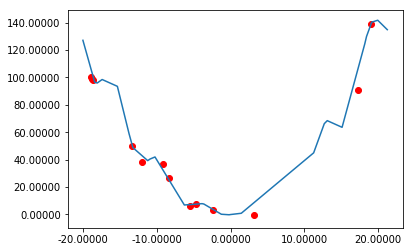

In [75]:
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.5f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
ax.scatter(x1, y1, c = 'r')
plt.show()

### Перша інтерполяційна формула Ньютона
f(X) = ln(x^3) + cos(x) + x

In [76]:
control_points = [
    8.420, 8.677, 10.250, 11.213,
    11.288, 11.942, 12.288, 12.463,
    12.834, 12.913, 14.207, 16.404,
    16.639, 16.942, 18.683, 18.795,
    19.071,
]

In [77]:
def f(x):
    return np.log(x**3) + np.cos(x) + x

In [78]:
x_values=np.linspace(6, 20, len(control_points))
y_values = np.array(list(map(f, x_values)))

In [79]:
def newton_method(x, x_values, y_values):
    n=len(x_values)
    f=np.zeros((n,n))
    f[:,0]=y_values
    for i in range(n-1,0,-1):
        for j in range(0,i):
            f[n-i+j,n-i]=(f[n-i+j,n-i-1]-f[n-i+j-1,n-i-1])/(x_values[n-i+j]-x_values[j])
    P=0
    for i in range(0,n):
        a=f[i,i]
        for j in range(0,i):
            a=a*(x-x_values[j])
        P=P+a
    return P

In [80]:
x=Symbol('X')
P=newton_method(x,x_values,y_values)
print('The interpolating polynomial is:')
expand(P)

The interpolating polynomial is:


2.59469878238185e-14*X**16 - 5.21715859393788e-12*X**15 + 4.81719266632398e-10*X**14 - 2.70770611702637e-8*X**13 + 1.03603102832376e-6*X**12 - 2.86015907914948e-5*X**11 + 0.000589563739537126*X**10 - 0.00926862525689755*X**9 + 0.112572694959192*X**8 - 1.06288929408596*X**7 + 7.79748042810571*X**6 - 44.0634689286626*X**5 + 188.170741826749*X**4 - 587.12418426211*X**3 + 1262.9246998059*X**2 - 1672.93768438468*X + 1031.93734978955

In [81]:
x_approx = np.array(control_points)
y_approx = lambdify(x, P)(x_approx)

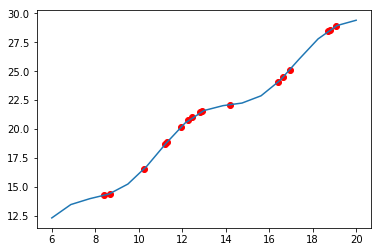

In [82]:
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.scatter(x_approx, y_approx, c = 'r')
plt.show()